<a href="https://colab.research.google.com/github/saadather94/SHAPES-DATASET/blob/master/imageprocessing_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [19]:
import os
import pandas as pd
from torch.utils.data import Dataset
from skimage import io


class ImageDataset(Dataset):

  def __init__(self, csv_file, root_dir, transform=None):

    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self, idx):

    img_path = os.path.join(self.root_dir,self.annotations.iloc[idx, 0])
    
    image = io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[idx, 1]))


    if self.transform:
        image = self.transform(image)

    return (image, y_label)

In [77]:


#from data_set import ImageDataset


dataset = ImageDataset(csv_file='/content/Data_set/Annotation.csv',root_dir='/content/Data_set/GreyIMG', transform= ToTensor() )


train, val = random_split(dataset, [200, 100])

In [89]:
from matplotlib import pyplot as plt
image, label = dataset[1]
print('image.shape:', image.shape)
#plt.imshow(image.permute(1,2,0), cmap='gray')
print('Label:', label)

image.shape: torch.Size([1, 30, 30])
Label: tensor(2)


In [79]:
train_ldr = DataLoader(train, batch_size=8, shuffle=True, num_workers=3, pin_memory=True)
val_ldr = DataLoader(val,batch_size=16, num_workers=3, pin_memory=True)

images.shape: torch.Size([8, 1, 30, 30])
label.shape: torch.Size([8])


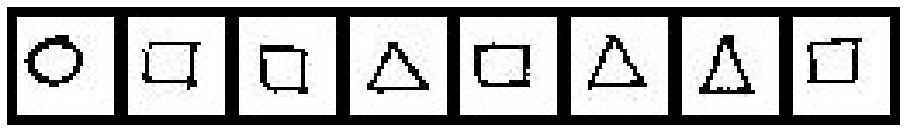

In [85]:
from torchvision.utils import make_grid

for images, _ in train_ldr:
    print('images.shape:', images.shape)
    print('label.shape:', _.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [90]:
for images, _ in train_ldr:
    
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 900)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([8, 1, 30, 30])
inputs.shape: torch.Size([8, 900])
